### Turning on RandomErase Augmentations
three seed, norm on vs off

In [4]:
from fastai2.vision.all import *
import sys
sys.path.append('..')

%load_ext autoreload
%autoreload 2

from modules.expbuilder import default_params, run_exp

train_path = Path('../../../rf-chess-data/cropped_v1/')
train_path = Path('../../../rf-chess-data/cropped_v1.1/')

test_path_all = Path('../../../other-chess-data/regulation-test-2-all/')
test_path_easy = Path('../../../other-chess-data/regulation-test-2-easy/')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


##### Run two demo runs

In [5]:
default_params

{'_expdesign_name': 'notnamed',
 '_condition_name': 'notnamed',
 '_train_name': 'rf-v1-crops',
 '_test_name': 'test-regulation-2-all',
 '_train_path': Path('../../../rf-chess-data/cropped_v1'),
 '_test_path': Path('../../../other-chess-data/regulation-test-2-all'),
 '_model_arch': <function torchvision.models.resnet.resnet50(pretrained=False, progress=True, **kwargs)>,
 '_fit_one_cycle_epochs': 10,
 '_fine_tune_epochs': 15,
 '_train_seed': 0,
 '_valid_pct': 0.2,
 '_rm_norm': False,
 '_learn_norm': False,
 '_mult': 1.0,
 '_max_lighting': 0.9,
 '_max_warp': 0.4,
 '_max_rotate': 20.0,
 '_resize_method': 'pad',
 '_pad_mode': 'reflection',
 '_bs': 32,
 '_p_lighting': 0.75,
 '_aug_re': False,
 '_re_params': {'p': 0.5,
  'sl': 0.0,
  'sh': 0.3,
  'min_aspect': 0.3,
  'max_count': 1},
 '_custom_crop': None,
 '_custom_train_fnames': None,
 '_custom_train_fnames_args': {}}

In [10]:
seeds = [0,1,2]

grid_params = [
    {'_expdesign_name': 're_aug',
     '_condition_name': f'p{_p}_sh{_sh}',
     '_test_name': 'test-regulation-2-easy',
     '_test_path': test_path_easy,
     '_model_arch': resnet50,
      '_custom_crop': 'my-top-crop',
     '_fine_tune_epochs': 20,
     '_rm_norm': True,
     '_aug_re': True,
     '_re_params': {'p': _p,'sl': 0.0,'sh': _sh,
                    'min_aspect': 0.3,'max_count': 3},
     '_train_seed': seed,
    }  
    for _p, _sh in ([0.8, 0.4], [0.5, 0.6])
    for seed in seeds]

In [11]:
grid_params

[{'_expdesign_name': 're_aug',
  '_condition_name': 'p0.8_sh0.4',
  '_test_name': 'test-regulation-2-easy',
  '_test_path': Path('../../../other-chess-data/regulation-test-2-easy'),
  '_model_arch': <function torchvision.models.resnet.resnet50(pretrained=False, progress=True, **kwargs)>,
  '_custom_crop': 'my-top-crop',
  '_fine_tune_epochs': 20,
  '_rm_norm': True,
  '_aug_re': True,
  '_re_params': {'p': 0.8,
   'sl': 0.0,
   'sh': 0.4,
   'min_aspect': 0.3,
   'max_count': 3},
  '_train_seed': 0},
 {'_expdesign_name': 're_aug',
  '_condition_name': 'p0.8_sh0.4',
  '_test_name': 'test-regulation-2-easy',
  '_test_path': Path('../../../other-chess-data/regulation-test-2-easy'),
  '_model_arch': <function torchvision.models.resnet.resnet50(pretrained=False, progress=True, **kwargs)>,
  '_custom_crop': 'my-top-crop',
  '_fine_tune_epochs': 20,
  '_rm_norm': True,
  '_aug_re': True,
  '_re_params': {'p': 0.8,
   'sl': 0.0,
   'sh': 0.4,
   'min_aspect': 0.3,
   'max_count': 3},
  '_train

In [12]:
for param in grid_params:
    
    run_params = default_params.copy()
    run_params.update(param)
    
    run_exp(run_params, 
            name_base='basicexp',
            b_msg=True, 
            b_cuda=True)

starting training...


saving to name_base: basicexp-72
Finished with:

{'valid_loss': 0.07915327697992325, 'accuracy': 0.9912891983985901}
{'test_loss': 0.26299726963043213, 'test_accuracy': 0.9012345671653748}


finished in 427.31 secs

starting training...


saving to name_base: basicexp-73
Finished with:

{'valid_loss': 0.09224844723939896, 'accuracy': 0.99303138256073}
{'test_loss': 0.27182886004447937, 'test_accuracy': 0.9197530746459961}


finished in 431.7 secs

starting training...


saving to name_base: basicexp-74
Finished with:

{'valid_loss': 0.08353221416473389, 'accuracy': 0.9912891983985901}
{'test_loss': 0.28950104117393494, 'test_accuracy': 0.8827160596847534}


finished in 431.81 secs

starting training...


saving to name_base: basicexp-75
Finished with:

{'valid_loss': 0.07413199543952942, 'accuracy': 0.9912891983985901}
{'test_loss': 0.23087070882320404, 'test_accuracy': 0.9320987462997437}


finished in 432.32 secs

starting training...


saving to name_base: basicexp-76
Finished with:

{'valid_loss': 0.08149763196706772, 'accuracy': 0.99303138256073}
{'test_loss': 0.20074312388896942, 'test_accuracy': 0.9197530746459961}


finished in 437.51 secs

starting training...


saving to name_base: basicexp-77
Finished with:

{'valid_loss': 0.0906478688120842, 'accuracy': 0.9912891983985901}
{'test_loss': 0.1630878746509552, 'test_accuracy': 0.9691358208656311}


finished in 436.55 secs



In [13]:
import os, sys
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import lines as mlines
from pathlib import Path

from modules.evalutils import get_dir_nums, get_tbls, param_diffs
from modules.evalutils import conj_plot_data

In [14]:
nums = get_dir_nums(log_dir='../models/model-logs/')

In [15]:
ret = get_tbls('basicexp', nums, log_dir='../models/model-logs')

d_metrics, d_resid, d_params = ret

In [16]:
cmp_param = '_condition_name'

In [11]:
# exps_default = d_params.iloc[56:60,:].index ; exps_default

Index(['basicexp-56', 'basicexp-57', 'basicexp-58', 'basicexp-59'], dtype='object')

In [17]:
exps_all = d_params[d_params['_expdesign_name'] == 're_aug'].index

In [18]:
# exps_all = exps_default.to_list() 
# exps_all += exps_diff.to_list()
exps_all

Index(['basicexp-66', 'basicexp-67', 'basicexp-68', 'basicexp-69',
       'basicexp-70', 'basicexp-71', 'basicexp-72', 'basicexp-73',
       'basicexp-74', 'basicexp-75', 'basicexp-76', 'basicexp-77'],
      dtype='object')

In [19]:
exp_params = d_params.T[exps_all]
param_diffs(exp_params)

_train_seed         3
model_fn           12
_condition_name     4
dtype: int64

In [20]:
tmp  = d_metrics.join(d_params[[cmp_param]], on='exp_name')

exp_metrics = tmp[tmp['exp_name'].isin(exps_all)]

In [21]:
exp_metrics['exp_name'].unique()

array(['basicexp-66', 'basicexp-67', 'basicexp-68', 'basicexp-69',
       'basicexp-70', 'basicexp-71', 'basicexp-72', 'basicexp-73',
       'basicexp-74', 'basicexp-75', 'basicexp-76', 'basicexp-77'],
      dtype=object)

In [22]:
d_params.loc[exps_all, '_test_path'].unique()

array(['../../../other-chess-data/regulation-test-2-easy'], dtype=object)

In [23]:
df_agg, color_ind = conj_plot_data(exp_metrics, cmp_param)

In [24]:
def foo(x): 
    if pd.isna(x):return 'blue'
    else: return x

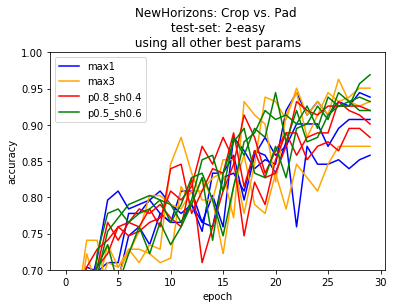

In [25]:
for i in range(df_agg.shape[0]):
    plt.plot(df_agg.T.iloc[:-1,i], 
             c=foo(df_agg.T.loc['color'][i]))
    
plt.title('NewHorizons: Crop vs. Pad \n test-set: 2-easy \n using all other best params ')
plt.ylabel('accuracy')
plt.xlabel('epoch')

handles = [mlines.Line2D([],[],c=foo(color)) 
           for color in color_ind.values ]
plt.legend(handles, [str(e) for e in color_ind.index])

axes = plt.gca()
axes.set_ylim([.7, 1.0]);

In [27]:
df_agg, color_ind = conj_plot_data(exp_metrics, cmp_param
                            ,values='test_loss')

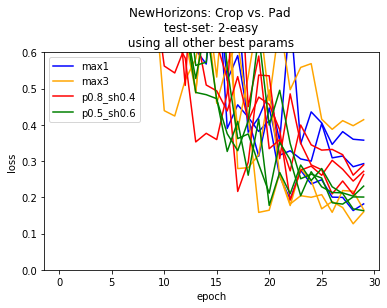

In [28]:
for i in range(df_agg.shape[0]):
    plt.plot(df_agg.T.iloc[:-1,i], 
             c=foo(df_agg.T.loc['color'][i]))
    
plt.title('NewHorizons: Crop vs. Pad \n test-set: 2-easy \n using all other best params ')
plt.ylabel('loss')
plt.xlabel('epoch')

handles = [mlines.Line2D([],[],c=foo(color)) 
           for color in color_ind.values ]
plt.legend(handles, [str(e) for e in color_ind.index])

axes = plt.gca()
axes.set_ylim([0.0, 0.6]);

##### Plot results

In [6]:
import os, sys
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import lines as mlines
from pathlib import Path

from modules.evalutils import get_dir_nums, get_tbls, param_diffs
from modules.evalutils import conj_plot_data

In [10]:
nums = get_dir_nums(log_dir='../models/model-logs/')

In [11]:
ret = get_tbls('basicexp', nums, log_dir='../models/model-logs')

d_metrics, d_resid, d_params = ret

In [12]:
cmp_param = '_condition_name'

In [13]:
exps_all = d_params[d_params['_expdesign_name'] == 'rm_norm'].index

In [14]:
exp_params = d_params.T[exps_all]
param_diffs(exp_params)

_train_seed        3
model_fn           6
_condition_name    2
_rm_norm           2
dtype: int64

In [15]:
tmp  = d_metrics.join(d_params[[cmp_param]], on='exp_name')

exp_metrics = tmp[tmp['exp_name'].isin(exps_all)]

In [16]:
exp_metrics['exp_name'].unique()

array(['basicexp-54', 'basicexp-55', 'basicexp-56', 'basicexp-57',
       'basicexp-58', 'basicexp-59'], dtype=object)

In [17]:
d_params.loc[exps_all, '_test_path'].unique()

array(['../../../other-chess-data/regulation-test-2-easy'], dtype=object)

In [18]:
df_agg, color_ind = conj_plot_data(exp_metrics, cmp_param)

In [20]:
def foo(x): 
    if pd.isna(x):return 'blue'
    else: return x

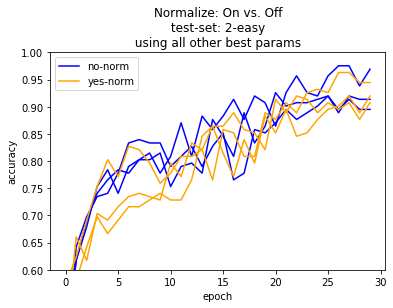

In [21]:
for i in range(df_agg.shape[0]):
    plt.plot(df_agg.T.iloc[:-1,i], 
             c=foo(df_agg.T.loc['color'][i]))
    
plt.title('Normalize: On vs. Off\n test-set: 2-easy \n using all other best params ')
plt.ylabel('accuracy')
plt.xlabel('epoch')

handles = [mlines.Line2D([],[],c=foo(color)) 
           for color in color_ind.values ]
plt.legend(handles, [str(e) for e in color_ind.index])

axes = plt.gca()
axes.set_ylim([.6, 1.0]);